# How I Played Risk of Rain 2 and made Everyone Suffer for it

## Let's get some background on this.
----------------------------------------------------
#### What it be:
*Risk of Rain 2* is third-person roguelike vidya game made by Hopoo Games. It's pretty rad, try it out.
#### Why I did this:
I wanted to play a vidya game instead of actually doing work so I just did both at the same time.
#### What I wanted to achieve:
Mostly, I just wanted to play *RoR2*. However, I *did* do some work and tried to see how item drop rates for the **Artifact of Sacrifice** worked as conditions changed.

# Let me explain this entire experiment real quick.
-----
## Gameplay Basics:
In RoR2, you progress through several 'Zones' until you reach the 'Teleporter' and get the hell out of dodge. These events spawn a beefy boss and an item per player when you beat it. You keep looping through zones and teleporters until you end the run. Runs end either via obliteration, secret boss fight, or dying horribly. The longer you play and the more time you spend in each Zone, the harder things get. Usually, you get items that augment your stats and do weird fun things via different crates and whatnot. However, said crates weren't present for this trial. You'll see why in a second.

## Parameters of this test:
------
### Players - 1
Just me. **SO** much easier to keep track of everything that way.

### Difficulty - Monsoon
It's the baseline hardest difficulty and I'm a gentle masochist.

### Target Enemies Killed per Level - 200
I figured it'd be good to try and establish a baseline number of enemies I was going to murder each level. This comes into a play a bit more in a second, so be patient.

### Character - Bandit.
I know he had to be modded in, but he's fun and it was **much** easier to control how many enemies I kill with him.

### Artifacts Used - Sacrifice and Command
- **Sacrifice** - Item crates and such don't spawn; Enemies drop items instead. Drop rate increases depending on time and difficulty.
- **Command** - Instead of dropping a random item, drops become nebulous 'material' that pops up a menu and lets you choose what item you get. This is important because some items cause massive area of effect damage, and that would make it *very* hard to control my enemies killed. Shit spirals **hard** in the late-game.

### Teleporter Restrictions
Enemies killed during 'Teleporter Events' were not counted towards the Zone total, neither were items dropped during aforementioned event. 

### Limitations - No Bazaar, Void Fields, or AoE items.
I already mentioned my reasoning for not using AoE items, but the Bazaar and Abyss are fun. 
- **The Bazaar** is a zone that lets you purchase and trade for some items, as well as choosing where you go next. I woulda just used the Bazaar to choose where I end up each stage, but I was running a bit low on Lunar Coins at the time so I decided it was better to not. I did go here once after **Stage 4 - Siren's Call** so that I could grab and item that lets me fist-fight the secret boss.
- **Void Fields** - This fun lil zone takes you out of the normal time constraints of the game and puts you in a special murderville. In the Scrappityville Horror, the air is poison and everything wants to kill you *so* much more than usual that they get items of their own. To get out of this darkest-timeline Riverdale, you have to hang around 'Cell Vents' that emit a zone of poison control and survive until they close. These cells drop items whenever they close, offering a pretty nice item boost without increasing the difficulty of the run. After you complete enough cells, the air stops being a dick and you get to walk around until you decide to leave. I **adore** going to this Zone. It makes and breaks runs and adds a fun lil spice to how the game normally plays. However, since the cells *and* enemies drop items, going here would completely bungle my test data. I never get to have fun.

#### Enough faffing about! Let's get to the data!

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('RoR2SacrificeDrops.csv')
df.head()

,Zone,Location,Time_At_End,E_Normal,E_Elite,E_Total,D_White,D_Green,D_Red,D_Total,L_Coins
0,1,Titanic Plains,7.12,192,8,200,8,4,0,12,1
1,2,Wetland Aspect,14.51,184,16,200,14,5,0,19,1
2,3,Rallypoint Delta,21.57,183,17,200,13,8,1,22,1
3,4,Siren's Call,25.41,177,23,200,18,6,0,24,0
4,5,Sky Meadow,28.06,181,19,200,14,10,2,26,2


## Hoooooo you know I gotta explain all that.
----------------
- **Zone** - Tells you which zone number I'm at. Straightforward.
- **Location** - Which map I played on! Didn't count the variants since the game doesn't.
- **Time_At_End** What the timer was at when the Teleporter Event was completed. Took a bit longer at the start due to spawn rates.
- **E_Normal and E_Elite** - Enemies spawn in two varieties: Normal and Elites. Elites have a higher drop rate than Normals, so it was important to log this.
- **D_White, D_Green, D_Red** - These describe what kind of drops I got. Items are sorted into three primary categories: Common(White), Uncommon(Green), and Rare(Red). There are two other kinda of items(Lunar/Blue, Boss/Yellow, and Equipment/Orange) but those can't drop outside of specific situations so I didn't count them.
- **E_Total and D_Total** - Literally just the totals for enemies and drops respectively.

## "But Thom", you ask "what can we even do with this?"
A ton of mostly useless but somewhat cool stuff!

### What we're gonna find out:
- If Location has any bearing on Drop Rates
- If Location affects Drop Rarity
- If Enemy Types affects Drop Rates
- If Enemy Types affects Drop Rarity
- If which zone/stage we're in affects Lunar Coin drop chance.

 Full disclosure, I know the answers to these already because I mod the fuck out of the game, but it'll be fun to scream at data points for a bit.

### Location Location Location!
-----
#### Let's do a bit of jiggling. We're gonna see if Location has any bearing on drops, but first, let's see which maps are the most common.

In [78]:
print(df['Location'].value_counts())

Sky Meadow            4
Wetland Aspect        3
Scorched Acres        3
Abyssal Depths        3
Titanic Plains        3
Rallypoint Delta      2
Distant Roost         2
Abandoned Aqueduct    2
Siren's Call          1
Name: Location, dtype: int64


That's right, folks. Best Map, **Scorched Acres**, dropped pretty often. Unfortunately, we got the awful **Abyssal Depths** more often than we got **Siren's Call**. On to seeing if what map we're on has any bearing on drops.

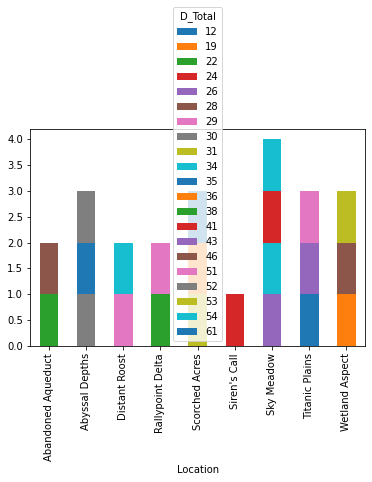

In [35]:
df.groupby(['Location'])['D_Total'].value_counts().unstack().plot(kind='bar', stacked=True)

### Oh god that's fucking unreadable. Let's try this again.
----
So, in *RoR2* Environments/Maps are sorted by which Zone # you're in when you go there. It's sorted as such:
- Zone #1 - **Distant Roost** and **Titanic Plains**
- Zone #2 - **Abandoned Aqueduct**(shit map) and **Wetland Aspect**
- Zone #3 - **Rallypoint Delta** and **Scorches Acres**
- Zone #4 - **Abyssal Depths** and **Siren's Call**
- Zone #5 - **Sky Meadow**. This is the only option and it's a bit boring.

Let's sort these bad bois into their Zone numbers, shall we?

In [105]:
def _zone_number(data):
    if data == "Titanic Plains" or data == "Distant Roost":
        return 1
    elif data == "Abandoned Aqueduct" or data == "Wetland Aspect":
        return 2
    elif data == "Rallypoint Delta" or data == "Scorched Acres":
        return 3
    elif data == "Abyssal Depths" or data == "Siren's Call":
        return 4
    else:
        return 5

df['Zone_Number'] = df["Location"].apply(_zone_number)
df.head()

,Zone,Location,Time_At_End,E_Normal,E_Elite,E_Total,D_White,D_Green,D_Red,D_Total,L_Coins,Zone_Number,Drop_Rating,Green_Value,White_Value,Red_Value
0,1,Titanic Plains,7.12,192,8,200,8,4,0,12,1,1,Low,Low,Low,Average
1,2,Wetland Aspect,14.51,184,16,200,14,5,0,19,1,2,Moderate,Low,Moderate,Average
2,3,Rallypoint Delta,21.57,183,17,200,13,8,1,22,1,3,Moderate,Low,Moderate,Moderate
3,4,Siren's Call,25.41,177,23,200,18,6,0,24,0,4,Moderate,Low,High,Average
4,5,Sky Meadow,28.06,181,19,200,14,10,2,26,2,5,Moderate,Low,Moderate,High


**Nice.** Now let's try that again.

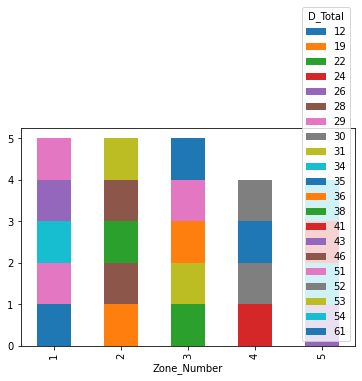

In [106]:
df.groupby(['Zone_Number'])['D_Total'].value_counts().unstack().plot(kind='bar', stacked=True)

#### That's... still pretty horrible to look at. One more again.
-----
To better visualize drop totals, we're going to assign some arbitrary ratings to it.

In [108]:
def _drop_rating(data):
    if data <= 15:
        return "Low"
    elif data >= 16 and data <= 30:
        return "Moderate"
    elif data >= 31 and data <= 45:
        return "High"
    elif data >= 46 and data <= 60:
        return "Excellent"
    else:
        return "Phenomenal"
df['Drop_Rating'] = df["D_Total"].apply(_drop_rating)
df.loc[df['Zone_Number'] == 3]

,Zone,Location,Time_At_End,E_Normal,E_Elite,E_Total,D_White,D_Green,D_Red,D_Total,L_Coins,Zone_Number,Drop_Rating,Green_Value,White_Value,Red_Value
2,3,Rallypoint Delta,21.57,183,17,200,13,8,1,22,1,3,Moderate,Low,Moderate,Moderate
7,8,Scorched Acres,39.43,73,127,200,8,23,0,31,1,3,High,Excellent,Low,Average
12,13,Scorched Acres,58.58,31,169,200,8,21,7,36,0,3,High,Excellent,Low,Phenomenal
17,18,Rallypoint Delta,76.59,31,169,200,22,29,0,51,1,3,Excellent,Phenomenal,Excellent,Average
22,23,Scorched Acres,100.43,0,200,200,23,37,1,61,0,3,Phenomenal,Phenomenal,Excellent,Moderate


### Nice Nice Nice.
--------
Now let's check what the Drop Rating of each Zone Number is!

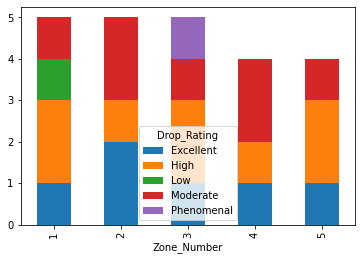

In [109]:
df.groupby(['Zone_Number'])['Drop_Rating'].value_counts().unstack().plot(kind='bar', stacked=True)

## Woo! Drop Rating get!
----
Looks like **Zone 3** has the best drop rating overall with that sweet sweet phenomenal.

## Next up, we're gonna see what the drop chance for each rarity of item is on each Zone Number.
----
Let's try assigning a rarity value for each drop type. We'll go with "Low", "Moderate", "High", "Excellent", and "Phenomenal".

In [110]:
def _white_value(data):
    if data <= 10:
        return "Low"
    elif data >= 11 and data <= 15:
        return "Moderate"
    elif data >= 16 and data <= 20:
        return "High"
    elif data >= 21 and data <= 25:
        return "Excellent"
    else:
        return "Phenomenal"

def _green_value(data):
    if data <= 10:
        return "Low"
    elif data >= 11 and data <= 15:
        return "Moderate"
    elif data >= 16 and data <= 20:
        return "High"
    elif data >= 21 and data <= 25:
        return "Excellent"
    else:
        return "Phenomenal"

def _red_value(data):
    if data == 0:
        return "Average"
    elif data == 1:
        return "Moderate"
    elif data == 2:
        return "High"
    elif data == 3:
        return "Excellent"
    else:
        return "Phenomenal"
    
df['White_Value'] = df["D_White"].apply(_white_value)
df['Green_Value'] = df["D_Green"].apply(_green_value)
df['Red_Value'] = df["D_Red"].apply(_red_value)
df.head()

,Zone,Location,Time_At_End,E_Normal,E_Elite,E_Total,D_White,D_Green,D_Red,D_Total,L_Coins,Zone_Number,Drop_Rating,Green_Value,White_Value,Red_Value
0,1,Titanic Plains,7.12,192,8,200,8,4,0,12,1,1,Low,Low,Low,Average
1,2,Wetland Aspect,14.51,184,16,200,14,5,0,19,1,2,Moderate,Low,Moderate,Average
2,3,Rallypoint Delta,21.57,183,17,200,13,8,1,22,1,3,Moderate,Low,Moderate,Moderate
3,4,Siren's Call,25.41,177,23,200,18,6,0,24,0,4,Moderate,Low,High,Average
4,5,Sky Meadow,28.06,181,19,200,14,10,2,26,2,5,Moderate,Low,Moderate,High


### Now let's see what the values for the Zone Numbers are like. Once more, with feeling!

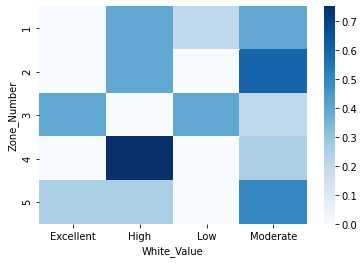

In [111]:
plt.show(sns.heatmap(pd.crosstab(df["Zone_Number"], df["White_Value"], normalize='index'), cmap="Blues"))

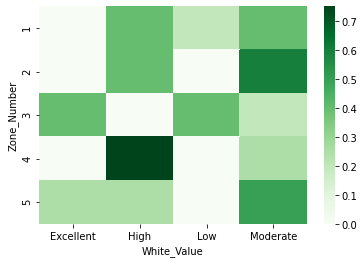

In [112]:
plt.show(sns.heatmap(pd.crosstab(df["Zone_Number"], df["White_Value"], normalize='index'), cmap="Greens"))

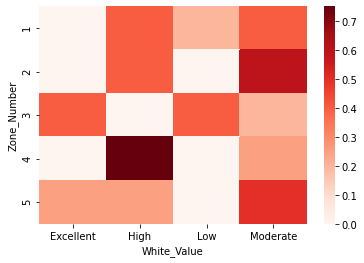

In [113]:
plt.show(sns.heatmap(pd.crosstab(df["Zone_Number"], df["White_Value"], normalize='index'), cmap="Reds"))

## BUT WHAT DOES IT ALL MEAN????
--------
It means the **Zone 2s** have the best Common drop chance, **Zones 1-3** are tied for Uncommon drop chance, and **Zone 3s** are the best for Reds!

## Aight next up: Enemy Type and Drop Rates
-----
Now we're going to see the difference between Normal Enemy drops and Elite Enemy Drops.

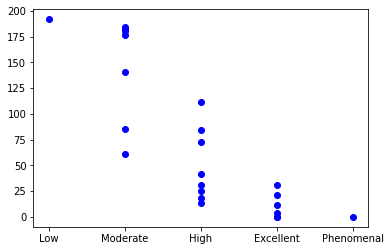

In [126]:
plt.plot(df['Drop_Rating'], df['E_Normal'], 'o', color='blue')

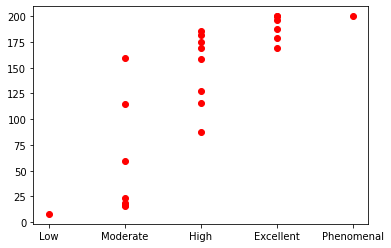

In [127]:
plt.plot(df['Drop_Rating'], df['E_Elite'], 'o', color='red')

### Well that's pretty damning.
Drop Rating increases directly with how many Elites are on the field instead of Normals. That's pretty rad.

## Next Up: More Heatmaps
--- 
Now we're going to see if the Drop Rating for each tier of item increases with Elite presence.

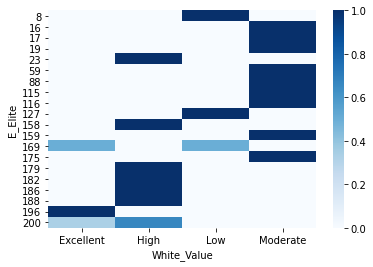

In [152]:
plt.show(sns.heatmap(pd.crosstab(df["E_Elite"], df["White_Value"], normalize='index'), cmap="Blues"))

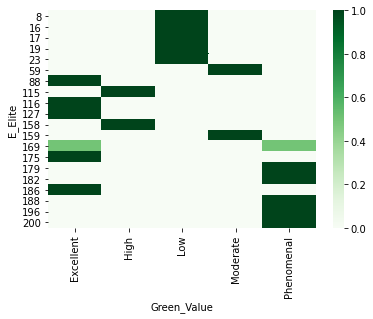

In [155]:
plt.show(sns.heatmap(pd.crosstab(df["E_Elite"], df["Green_Value"], normalize='index'), cmap="Greens"))

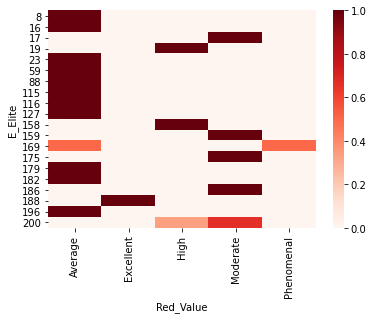

In [156]:
plt.show(sns.heatmap(pd.crosstab(df["E_Elite"], df["Red_Value"], normalize='index'), cmap="Reds"))

### Results!
These appear... mostly unrelated, actually. That's kind of surprising, but I'm here for it.

## Finally, let's see if Lunar Coins drop rate increases as we play longer.

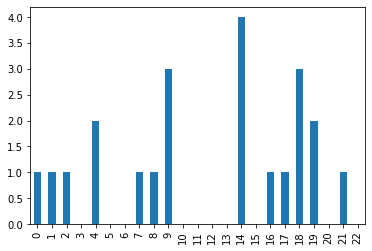

In [136]:
df['L_Coins'].plot.bar()

*Kiiiiinda*? But it's really not consistent.

# Wrapping it all up
-----
## Conclusions we've drawn:
- Location appears to have an effect on Drop Rates, with Zone 3s having the best Drop Rating.
- Location appears to have an effect on what tier of item drops. Zone 2s are the best for Commons, Zone 1-3s are tied for Uncommons, and Zone 3s have the best Rare drop rate.
- Enemy Type has a direct correlation with drop rate, with the drop rate increasing the more Elites are present.
- Enemy type does not appear to affect Drop Rarity. 

## Issues with the Dataset:
- While Zone is an indrect measurement of time spent, none of this has *really* been measured against how Time is affecting any of this. Further data wrangling needed for that.
- A lot of these graphs could probably be replaced with better ones. That's a task reserved for when I'm not exhausted.

## At the end of the day:
#### I had a pretty okay time playing video games for class, but I could really use a nap. Now that I'm done screeching about drop rates, I'm gonna go do that.